# A simple demo of the package

In [1]:
##conda create -n rrr glmnet_py scanpy jupyterlab pandas scikit-learn openpyxl xlrd

In [2]:
##%matplotlib notebook

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pickle

import sparseRRR

In [62]:
def preprocess(data,normalize='cpm'):
    X = data['counts'][:,data['mostVariableGenes']] / np.sum(data['counts'], axis=1)
    if normalize=='cpm':
        X *= 1e+6
    elif normalize=='median':
        X *= np.median(np.array(np.sum(data['counts'],axis=1)))
    X = np.array(X)
    X = np.log2(X + 1)
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    Y = data['ephys']
    Y = Y - np.mean(Y, axis=0)
    Y = Y / np.std(Y, axis=0)
    
    return (X,Y)

In [63]:
def format_scala2020():
    data = pickle.load(open('data/scala2020.pickle', 'rb'))
    data["counts"]=data["counts"].todense()
    cl=sorted(set(data['ttype']))
    data['colors']=dict( zip(cl, [mpl.colors.rgb2hex(c) for c in mpl.cm.get_cmap('deep',len(cl)).colors]))
    return data

In [64]:
def format_scala2019():
    data = pickle.load(open('data/scala2019.pickle', 'rb'))
    data["counts"]=data["counts"].todense()
    #data['ttype']=data['regions'] 
    data['ttype']=data['layers']
    cl=sorted(set(data['ttype']))
    data['colors']=dict( zip(cl, [mpl.colors.rgb2hex(c) for c in mpl.cm.get_cmap('tab20',len(cl)).colors]))
    return data

In [65]:
def format_cadwell():
    data = pickle.load(open('data/cadwell2016.pickle', 'rb'))
    data["counts"]=data["counts"].todense()
    data['ttype']=data['cellTypes']
    genes = data['genes'][data['mostVariableGenes']]
    cl=sorted(set(data['ttype']))
    data['colors']=dict( zip(cl, [mpl.colors.rgb2hex(c) for c in mpl.cm.get_cmap('tab20',len(cl)).colors]))
    return data

In [73]:
def format_gouwen():
    data = pickle.load(open('data/gouwens2020.pickle', 'rb'))
    data["counts"]=data["counts"].todense().astype(np.float64)##np.asarray(np.expm1(data['counts']).astype(int))
    genes = data['genes'][data['mostVariableGenes']]
    cl=sorted(set(data['ttype']))
    data['colors']=dict( zip(cl, [mpl.colors.rgb2hex(c) for c in mpl.cm.get_cmap('tab20',len(cl)).colors]))
    return data

In [100]:
def format_fuzik():
    data = pickle.load(open('data/fuzik2016.pickle', 'rb'))
    data["counts"]=data["counts"].todense()
    data['ttype']=data['cluster']
    cl=sorted(set(data['ttype']))
    data['colors']=dict( zip(cl, [mpl.colors.rgb2hex(c) for c in mpl.cm.get_cmap('tab20',len(cl)).colors]))
    return data

In [94]:
data = pickle.load(open('data/fuzik2016.pickle', 'rb'))
data["counts"]=data["counts"].todense()
key_type='cluster'
print(data['counts'].shape)
X,Y = preprocess(data)
#genes = data['genes'][data['mostVariableGenes']]
print('Shape of X:', X.shape, '\nShape of Y:', Y.shape)
print(len(data['genes']))

(80, 13089)
Shape of X: (80, 1313) 
Shape of Y: (80, 80)
13089


In [ ]:
## the next cell assumes that you have preprocessed anndata objects for your rnaseq data.

In [148]:
ephy_reduced_features=['IV_resistance', 'IV_baseline', 'IV_first_spike_amplitude', 'IV_first_spike_threshold',
 'IV_first_spike_thr2ahp', 'IV_first_spike_delay', 'IV_first_spike_half_width','IV_first_spike_max_fall_slope', 
 'IV_first_spike_max_rise_slope','IV_max_nb_spikes', 'IV_rebound_spikes_(-50.0 pA)', 'IV_rheobase',
 'IV_sagratio_I=-80.0 pA', 'IV_tc', 'IV_rheo_nb_spikes','SYN_evt_overallfreq', 'SYN_evt_wtc_mean'
  #'IV_first_spike_interval', #'IV_max_duration', #'IV_gain', #'IV_sfa_freq_log',
  #'IV_sfa_peak_log', #'RAMP_iorect_40_over_120',
    ]
ephy_reduced_features=['IV_resistance', 'IV_baseline', 'IV_first_spike_amplitude', 'IV_first_spike_threshold',
 'IV_first_spike_thr2ahp', 'IV_first_spike_delay', 'IV_first_spike_half_width',
 #'IV_first_spike_max_fall_slope', 
 'IV_first_spike_max_rise_slope',
                       #'IV_max_nb_spikes', 
            'IV_rheobase',
 'IV_sagratio_I=-80.0 pA', 'IV_tc',
  #'IV_first_spike_interval', 
  #'IV_max_duration', #'IV_gain', #'IV_sfa_freq_log',
  #'IV_sfa_peak_log', #'RAMP_iorect_40_over_120',
    ]
import anndata
def format_pseq():
    rna=anndata.read_h5ad("rna.h5ad")
    ephy=anndata.read_h5ad("../bioinfo/matrices/h5ad/pain_ephy.h5ad")
    ephy=ephy[rna.obs.index.to_list(),ephy_reduced_features]
    ## discard some cells with missing features. or indrf
    notna=ephy.to_df().dropna(axis=0).index.to_list()
    #notna=[x for x in notna if x.endswith('s')]
    ephy=ephy[notna,:].copy()
    rna=rna[notna,:].copy()
    
    cl=sorted(set(rna.obs.clusters))
    colors=dict( zip(cl, [mpl.colors.rgb2hex(c) for c in mpl.cm.get_cmap('tab20',len(cl)).colors]))
    data={
        'counts':np.asmatrix(rna.X),
        'cells':ephy.obs_names.to_numpy(),
        'genes':rna.var_names.to_numpy(),
        'mostVariableGenes':rna.var["hvg2500"],
        'ephys':ephy.X,
        'ephysNames':ephy.var_names.to_numpy(),
        'ttype':rna.obs["clusters"].to_numpy(),
        'colors': colors
           }
    return data

In [156]:
data=format_cadwell()

/tmp/ipykernel_3344680/608730492.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  data['colors']=dict( zip(cl, [mpl.colors.rgb2hex(c) for c in mpl.cm.get_cmap('tab20',len(cl)).colors]))


In [157]:
data["counts"].shape

(44, 15074)

In [158]:
X,Y = preprocess(data)
genes = data['genes'][data['mostVariableGenes']]

print('Shape of X:', X.shape, '\nShape of Y:', Y.shape)

Shape of X: (44, 3000) 
Shape of Y: (44, 11)


CPU times: user 0 ns, sys: 4 μs, total: 4 μs
Wall time: 17.4 μs

Genes selected: 30
Cxcl14, Ptprf, Plch2, Ttr, Pacsin2, Olfm2, Ccdc177, Asic4, Ano10, Ptprt, Spry4, Rbm38, Gorasp1, Mettl17, Camkv, Ndp, Celf6, Ppp2r2b, Ntrk3, Cactin, Foxg1, Trpm3, Kazn, Nrcam, Rpp25, Gnaz, Phlda1, Rpn2, Slc19a2, Plxna2


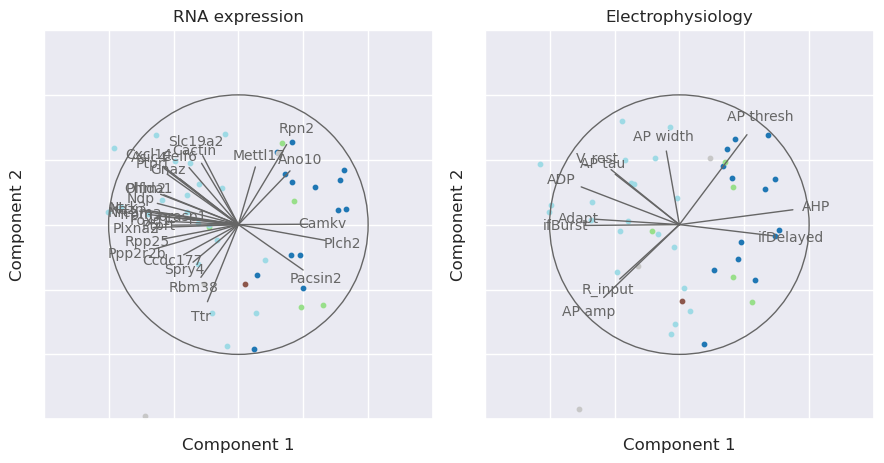

In [159]:
%time 
#w,v = sparseRRR.relaxed_elastic_rrr(X, Y, rank=2, lambdau=.4, alpha=1)
w,v = sparseRRR.relaxed_elastic_rrr(X, Y, rank=2, lambdau=.4, alpha=1.0)
#w,v = sparseRRR.relaxed_elastic_rrr(X, Y, rank=2, lambdau=0.1, alpha=0.75)

print('\nGenes selected: {}'.format(np.sum(w[:,0]!=0)))
print(', '.join(genes[w[:,0]!=0]))
#%matplotlib inline

sparseRRR.bibiplot(X, Y, w, v, 
                   titles = ['RNA expression', 'Electrophysiology'],
                   cellTypes = data['ttype'], 
                   cellTypeColors = data['colors'], 
                   YdimsNames = data['ephysNames'], 
                   XdimsNames = genes)

1.......... Time: 0.0h  0m 18s


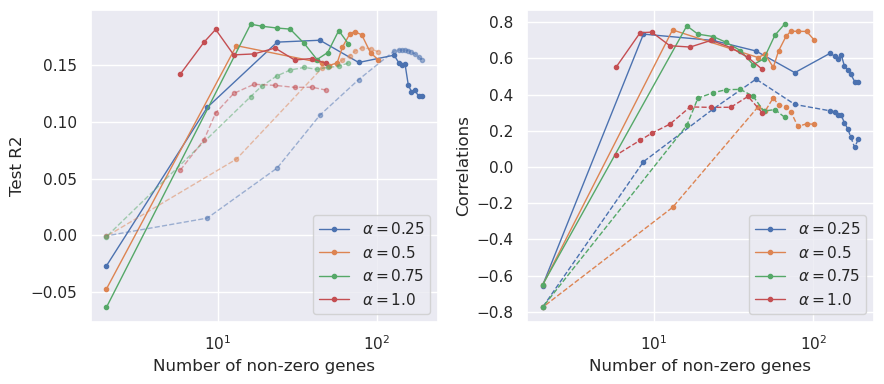

In [160]:
lambdas = np.concatenate((np.arange(.2,1.01,.1), np.arange(2,7)))
alphas = np.array([.25, .5, .75, 1])

cvResults = sparseRRR.elastic_rrr_cv(X, Y, alphas=alphas, lambdas=lambdas)

sparseRRR.plot_cv_results(*cvResults, alphas)

In [161]:
##%time bootCounts = sparseRRR.elastic_rrr_bootstrap(X, Y, lambdau=.4, alpha=1)
%time bootCounts = sparseRRR.elastic_rrr_bootstrap(X, Y, lambdau=0.2, alpha=1.0)

args = np.argsort(bootCounts)[::-1]
print('')
for i in range(20):
    print('{:10} {:.2f}'.format(genes[args[i]], bootCounts[args[i]]))

.................................................................................................... 
CPU times: user 42.3 s, sys: 3.01 ms, total: 42.3 s
Wall time: 8.48 s

Kazn       0.62
Rpn2       0.46
Ano10      0.43
Ppp2r2b    0.41
Ntrk3      0.40
Cplx2      0.39
Plch2      0.36
Nrcam      0.34
Ttr        0.32
Ndp        0.32
Slamf9     0.31
Efcab7     0.29
Asic4      0.28
Col4a1     0.28
Foxg1      0.28
Plxna2     0.27
Slc19a2    0.27
Grip2      0.25
Rbm38      0.24
Epb4.1l4a  0.24


CPU times: user 36.2 s, sys: 1.99 ms, total: 36.2 s
Wall time: 1.81 s


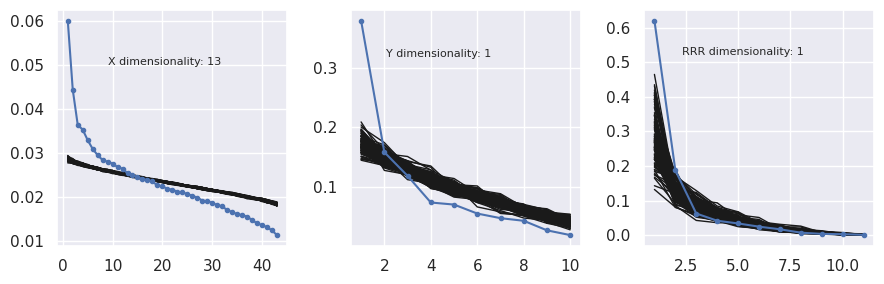

In [162]:
# A quick and dirty way to estimate the dimensionality

%time sparseRRR.dimensionality(X, Y)

In [163]:
for i in range(40):
    print('{:10} {:.2f}'.format(genes[args[i]], bootCounts[args[i]]))

Kazn       0.62
Rpn2       0.46
Ano10      0.43
Ppp2r2b    0.41
Ntrk3      0.40
Cplx2      0.39
Plch2      0.36
Nrcam      0.34
Ttr        0.32
Ndp        0.32
Slamf9     0.31
Efcab7     0.29
Asic4      0.28
Col4a1     0.28
Foxg1      0.28
Plxna2     0.27
Slc19a2    0.27
Grip2      0.25
Rbm38      0.24
Epb4.1l4a  0.24
Celf6      0.23
2810021J22Rik 0.23
Ccdc177    0.21
Ctla2a     0.21
Lmcd1      0.20
Ptprf      0.20
Trpm3      0.20
A230077H06Rik 0.20
Itm2a      0.19
Fip1l1     0.19
Trpc4      0.18
Sorcs1     0.18
Epha10     0.18
Pwp2       0.18
Glis2      0.17
Spry4      0.17
Mapk11     0.17
Wdr82      0.17
Rpp25      0.17
Rela       0.16
